In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

c:\Python39\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


1. Считать в pandas.DataFrame любой источник данных:

In [2]:
df = pd.read_csv("shopping_trends_updated.csv")

Датасет содержит набор данных о покупательских предпочтениях клиентов. Предлагает ценную информацию о поведении потребителей и моделях покупок. 

| Признак         | Описание                                              | Единицы измерения |
|-----------------|-------------------------------------------------------|-------------------|
| Gender          | Gender of the customer (Male/Female)                  |                   |
| Category        | Category of the item purchased                        |                   |
| Location        | Location where the purchase was made                  |                   |
| Review Rating   | Rating given by the customer for the purchased item   |                   |
| Shipping Type   | Type of shipping chosen by the customer               |                   |
| Payment Method  | Customer's most preferred payment method              |                   |

3. Matplotlib:

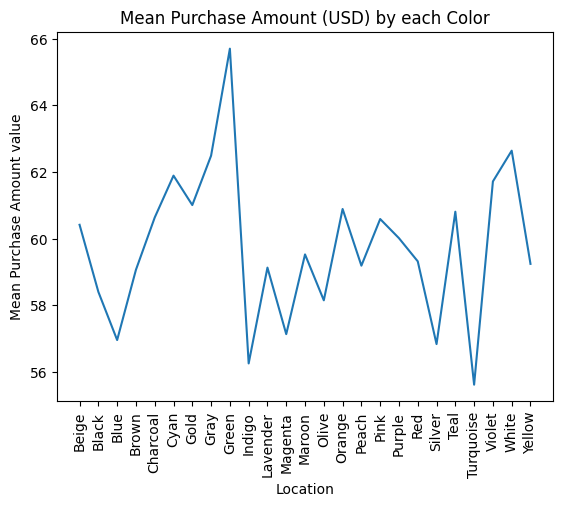

In [3]:
df_grouped = df.groupby("Color")[["Purchase Amount (USD)"]].mean()
df_grouped.reset_index(inplace=True)

plt.plot(df_grouped["Color"], df_grouped["Purchase Amount (USD)"])

plt.title("Mean Purchase Amount (USD) by each Color")
plt.xlabel("Color")
plt.ylabel("Mean Purchase Amount value")
plt.xticks(rotation='vertical')

plt.show()

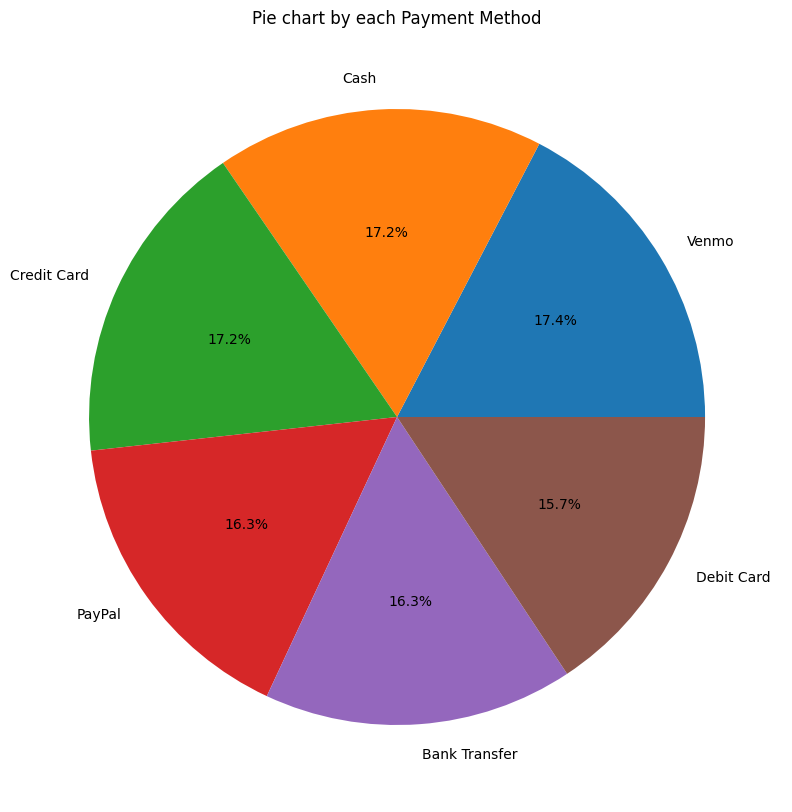

In [7]:
df_grouped = df["Payment Method"].value_counts()
values = df_grouped.to_list()
labels = df["Payment Method"].unique()

plt.figure(figsize=(10, 10))
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title("Pie chart by each Payment Method")
plt.show()

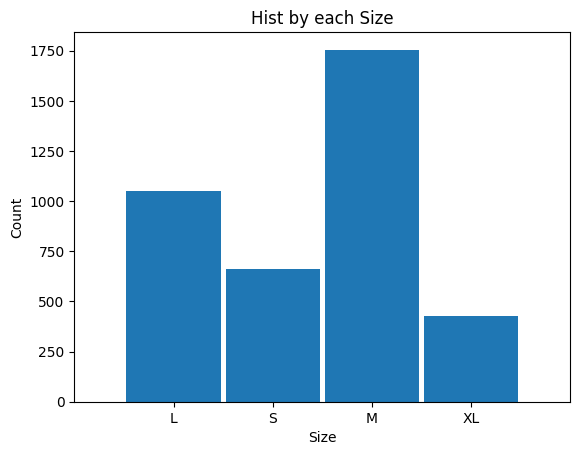

In [35]:
plt.hist(df["Size"], bins=[0, 1, 2, 3, 4], align='left', rwidth=0.95)

plt.title("Hist by each Size")
plt.xlabel("Size")
plt.ylabel("Count")
plt.xlim(-1, 4)

plt.show()

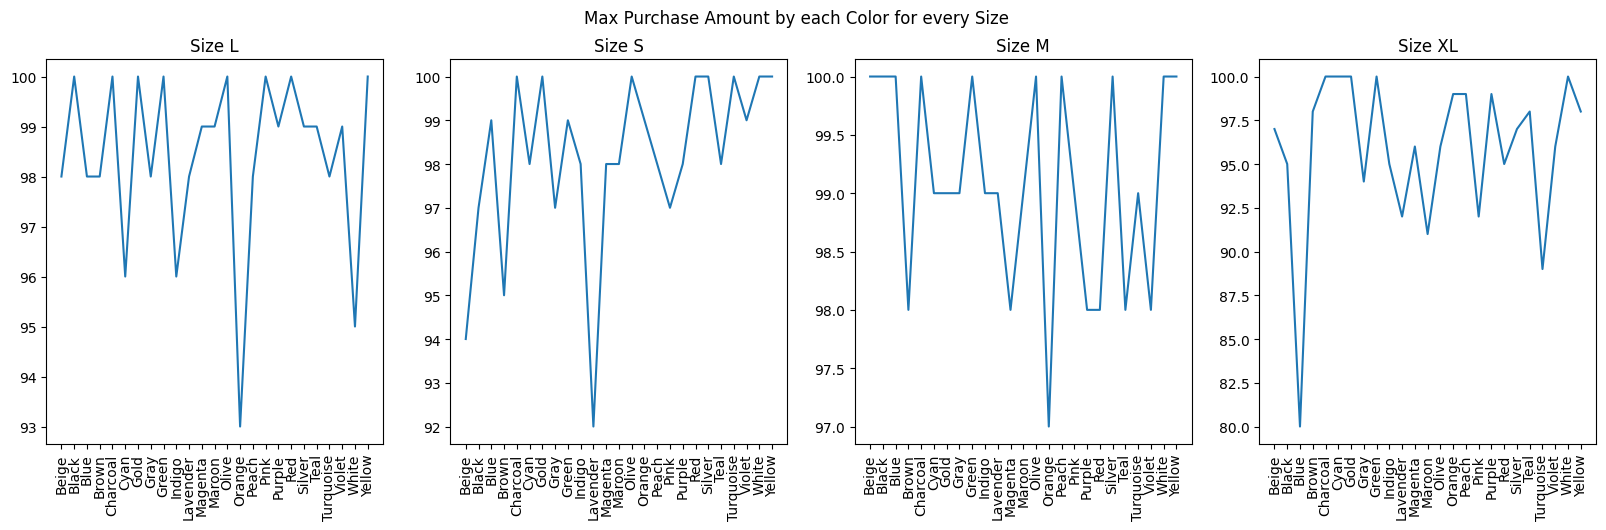

In [4]:
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

for i, generation in enumerate(df["Size"].unique()):
    generation_data = df[df["Size"] == generation]
    gd_grouped = generation_data.groupby("Color")[["Purchase Amount (USD)"]].max()
    gd_grouped.reset_index(inplace=True)

    axs[i].plot(gd_grouped["Color"], gd_grouped["Purchase Amount (USD)"])
    axs[i].tick_params(axis='x', rotation=90)
    axs[i].set_title(f"Size {generation}")

fig.suptitle("Max Purchase Amount by each Color for every Size")
plt.show()

In [5]:
import pandas as pd
import plotly.express as px
import dash
from dash import dcc, html
from dash.dependencies import Input, Output

app = dash.Dash(__name__)
app.layout = html.Div([
    html.H1("Shopping Trends Analysis"),
    dcc.Dropdown(
        id='category-dropdown',
        options=[{'label': category, 'value': category} for category in df['Category'].unique()],
        value=df['Category'].unique()[0]
    ),
    dcc.Graph(id='scatter-plot')
])

@app.callback(
    Output('scatter-plot', 'figure'),
    Input('category-dropdown', 'value')
)
def update_figure(selected_category):
    filtered_df = df[df['Category'] == selected_category]
    fig = px.scatter(filtered_df, x='Age', y='Purchase Amount (USD)', color='Gender',
                     title=f'Purchase Amount vs Age for {selected_category}',
                     labels={'Age': 'Age', 'Purchase Amount (USD)': 'Purchase Amount (USD)'},
                     hover_data=['Item Purchased', 'Review Rating', 'Location'])
    return fig

if __name__ == '__main__':
    app.run_server(debug=True)

4. Pandas:

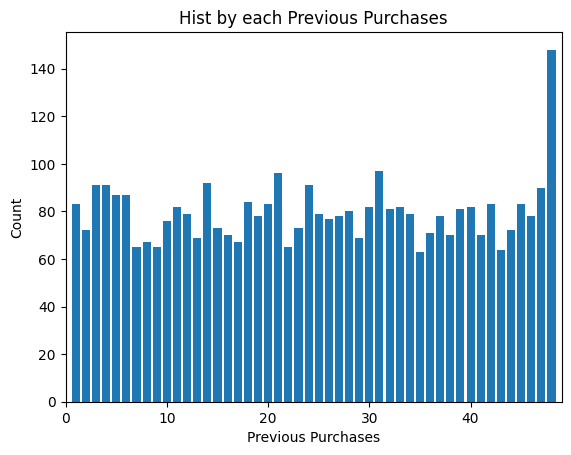

In [6]:
df["Previous Purchases"].plot(kind='hist', bins=np.linspace(0, 49, dtype=int), align='left', rwidth=0.8)
plt.title("Hist by each Previous Purchases")
plt.xlabel("Previous Purchases")
plt.ylabel("Count")
plt.xlim(0, 49)
plt.show()

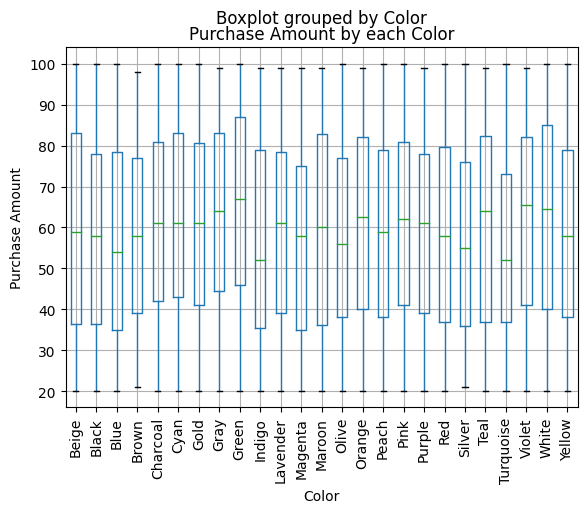

In [7]:
df.boxplot(column="Purchase Amount (USD)", by="Color")

plt.title("Purchase Amount by each Color")
plt.xlabel("Color")
plt.ylabel("Purchase Amount")
plt.xticks(rotation='vertical')

plt.show()

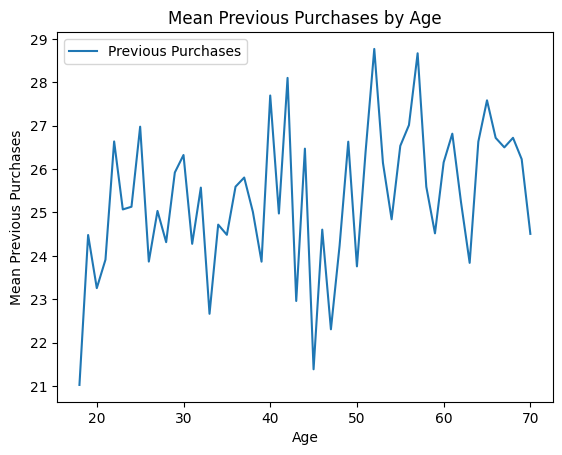

In [8]:
df_a = df.groupby(["Age"])[["Previous Purchases"]].mean().plot()

plt.title("Mean Previous Purchases by Age")
plt.xlabel("Age")
plt.ylabel("Mean Previous Purchases")
plt.show()

Тут я уже устал с датасетом без цифр <br>
Вот новый: https://www.kaggle.com/datasets/prokid1911/dota-2-all-hero-data-727d/data

Датасет содержит харрактеристики всех героев доты в зависимости от их уровня. Для киберспорта возможно полезный датасет, а так прикольно просто. 

| Признак         | Описание                                              | Единицы измерения |
|-----------------|-------------------------------------------------------|-------------------|
| Hero            | Название персонажа                                    |                   |
| Health_lvl15    | Здоровье на 15 уровне прокачки персонажа              |                   |
| Armor_lvl15     | Броня на 15 уровне прокачки персонажа                 |                   |
| Att/sec_lvl15   | Скорость атаки на 15 уровне прокачки персонажа        |                   |

In [26]:
df1 = pd.read_csv("dota.csv")
df1.head(20)
df1.describe()

RangeIndex(start=0, stop=120, step=1)

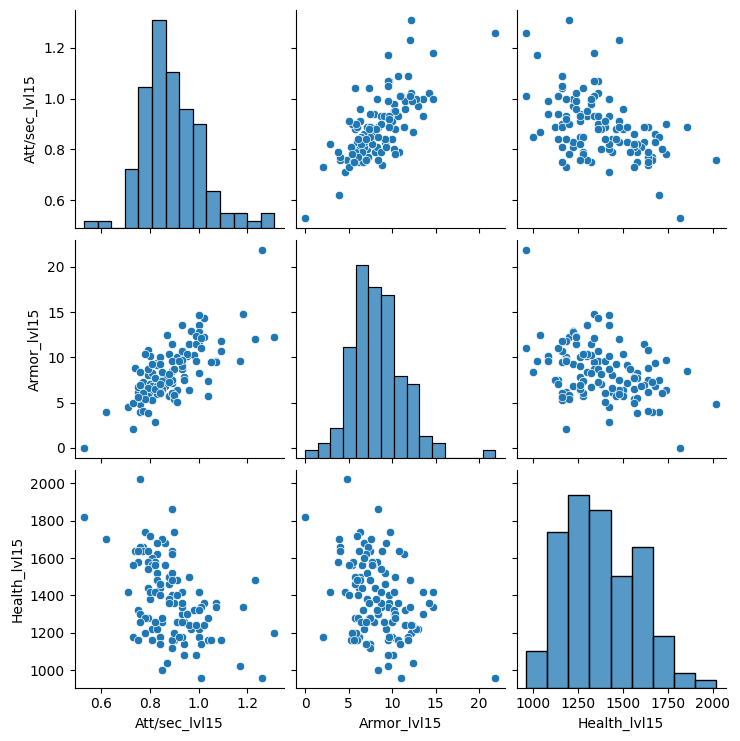

In [27]:
sns.pairplot(df1[["Att/sec_lvl15", "Armor_lvl15", "Health_lvl15"]])
plt.show()

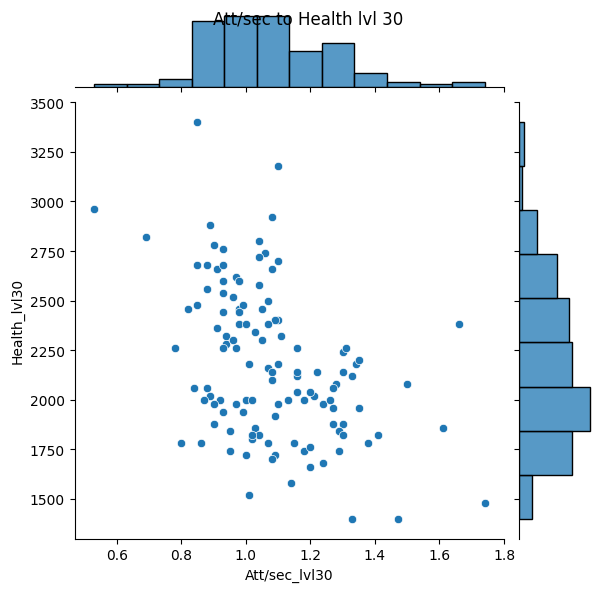

In [30]:
sns.jointplot(x="Att/sec_lvl30", y="Health_lvl30", data=df1, kind='scatter')

plt.suptitle("Att/sec to Health lvl 30")
plt.show()

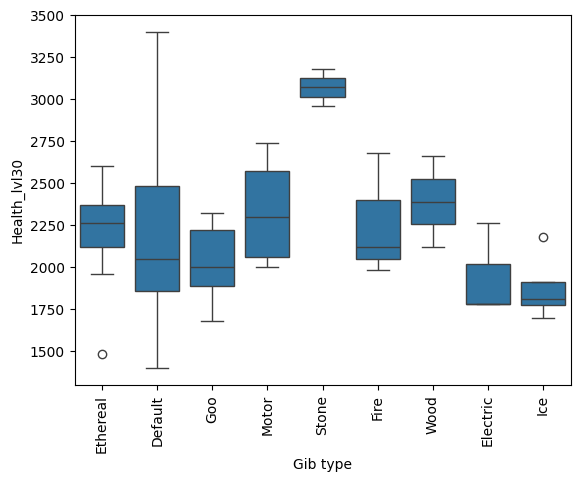

In [40]:
plt.figure()
sns.boxplot(x='Gib type', y='Health_lvl30', data=df1)
plt.xticks(rotation=90)
plt.show()

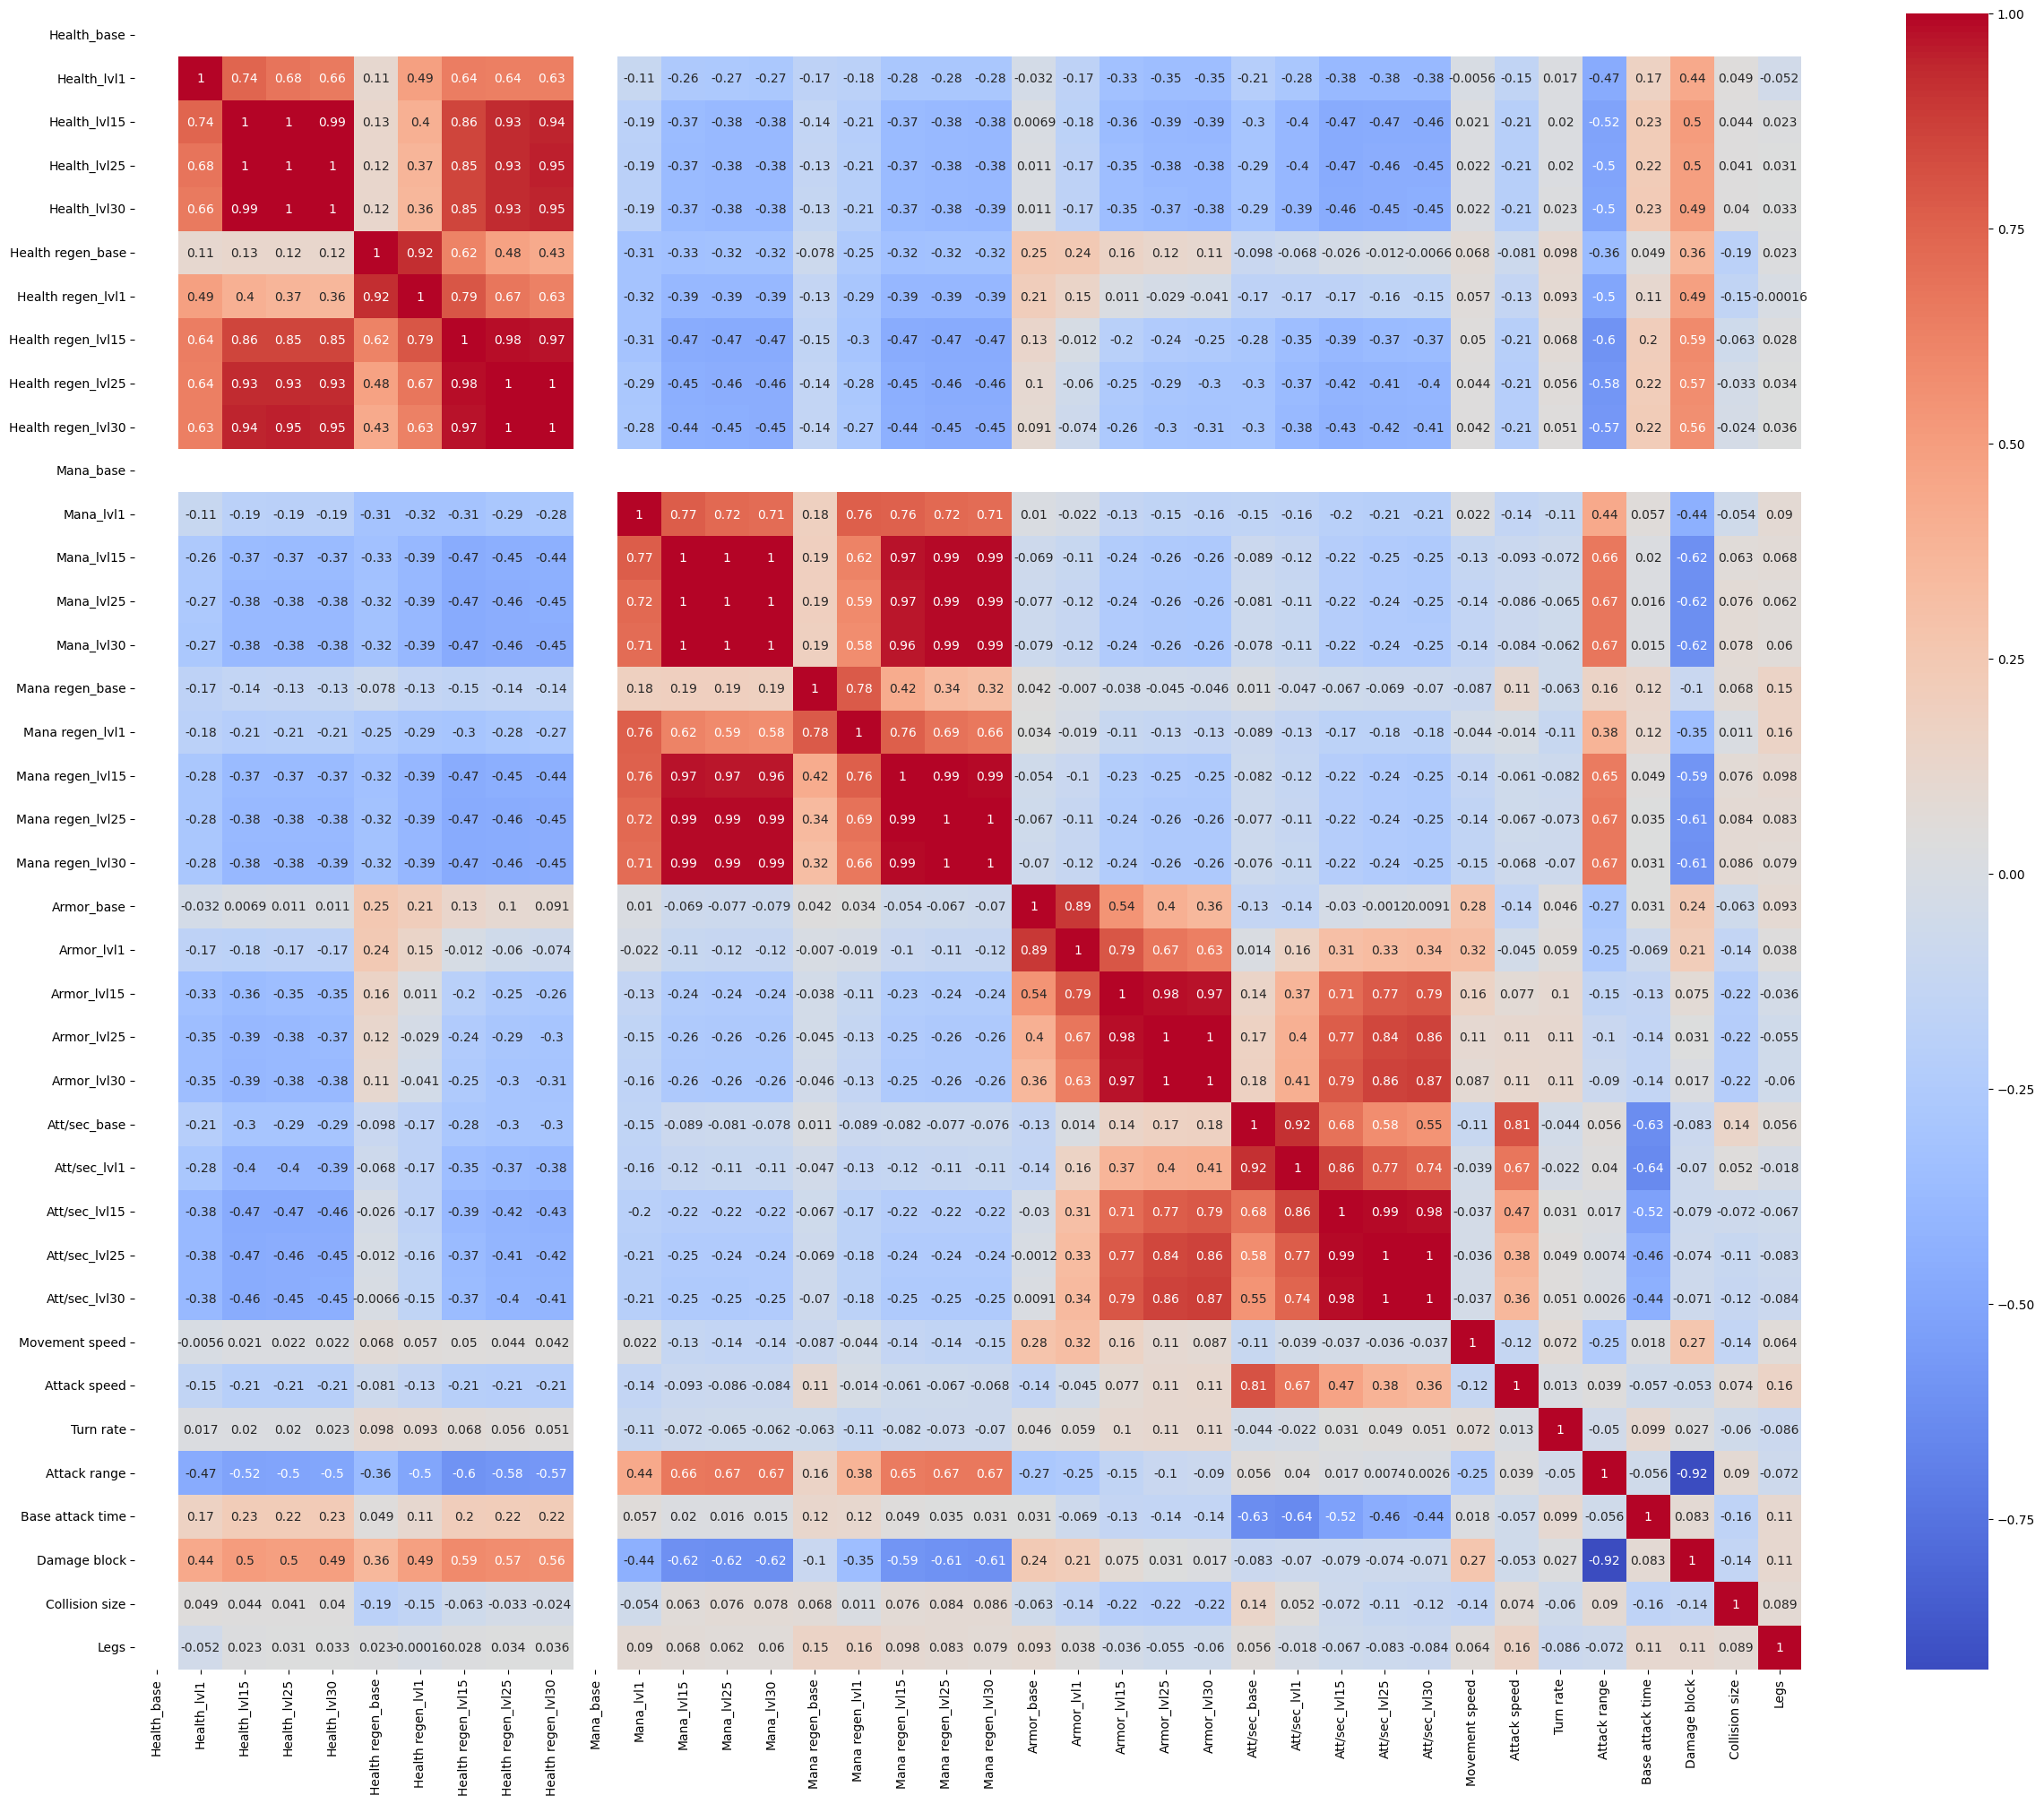

In [45]:
numeric_data = df1.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(30, 24))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.show()

6. Scipy.stats:

In [49]:
import scipy.stats as stats

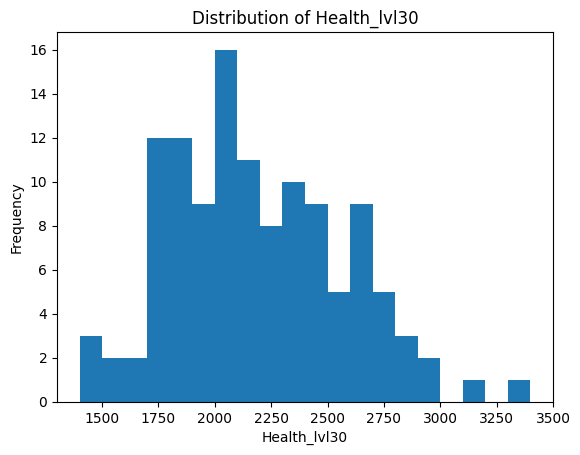

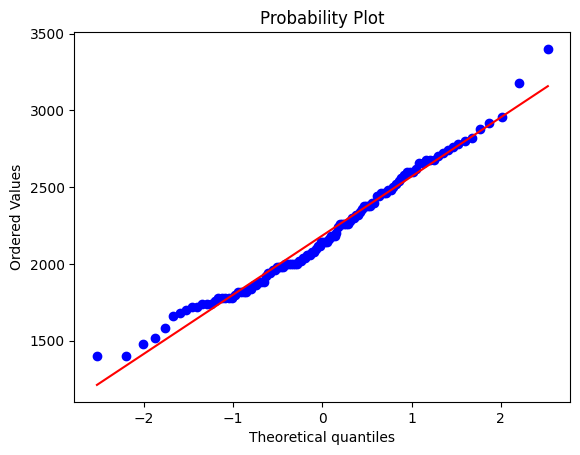

In [52]:
plt.figure()
df1['Health_lvl30'].plot(kind='hist', bins=20, title='Distribution of Health_lvl30')
plt.xlabel('Health_lvl30')
plt.show()

# QQ-график
plt.figure()
stats.probplot(df1['Health_lvl30'], dist="norm", plot=plt)
plt.show()

7. Plotly:

In [54]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Histogram(x=df1["Attack range"])])

fig.update_layout(
    title="Hist for Attack range",
    xaxis_title="Attack range",
    yaxis_title="Count of heroes"
)

fig.show()

In [56]:
fig = go.Figure(data=[go.Pie(labels=df1["Gib type"].unique(),
                             values=df1["Gib type"].value_counts().to_list())])

fig.update_layout(
    title="Pie chart for Type"
)

fig.show()

In [59]:
df_group = df1.groupby("Gib type")[["Health_lvl15"]].mean()
df_group.reset_index(inplace=True)

fig = go.Figure(data=[go.Scatter(x=df_group["Gib type"],
                                 y=df_group["Health_lvl15"],
                                 mode='lines')])

fig.update_layout(
    title="Mean Health_lvl15 for each Type",
    xaxis_title="Type",
    yaxis_title="Health_lvl15"
)

fig.show()

In [68]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.io as pio

fig = make_subplots(rows=2, cols=2, subplot_titles=('Line Plot', 'Histogram', 'Boxplot', 'Scatter Plot'))

fig.add_trace(go.Scatter(x=df_group['Gib type'], y=df_group['Health_lvl15'], mode='lines', name='Line Plot'), row=1, col=1)
fig.add_trace(go.Scatter(x=df1['Health_lvl15'], y=df1['Armor_lvl15'], mode='markers', name='Scatter Plot'), row=1, col=2)
fig.add_trace(go.Box(x=df1['Gib type'], y=df1['Health_lvl15'], name='Boxplot'), row=2, col=1)
fig.add_trace(go.Histogram(x=df1['Health_lvl15'], nbinsx=20, name='Histogram'), row=2, col=2)

fig.update_layout(height=800, width=1000, title_text="Multiple Subplots")
pio.show(fig)

In [75]:
df_avg_health = df1.groupby(['Attack range', 'Gib type'])[['Health_lvl30']].mean().reset_index()

fig = go.Figure()

for atk_range in df_avg_health['Attack range'].unique():
    df_atk_range = df_avg_health[df_avg_health['Attack range'] == atk_range]
    fig.add_trace(go.Scatter(x=df_atk_range['Gib type'], y=df_atk_range['Health_lvl30'], mode='lines+markers', name=str(atk_range), visible=False))

steps = []
for i, atk_range in enumerate(df_avg_health['Attack range'].unique()):
    step = dict(
        method="update",
        args=[{"visible": [False] * len(df_avg_health['Attack range'].unique())},
              {"title": f"Average Health by Gib type in {atk_range}"}],
        label=str(atk_range)
    )
    step["args"][0]["visible"][i] = True
    steps.append(step)

sliders = [dict(
    active=0,
    pad={"t": 50},
    steps=steps
)]

fig.update_layout(
    sliders=sliders,
    title="Average Health by Gib type",
    xaxis_title="Gib type",
    yaxis_title="Average Health"
)

fig.data[0].visible = True

pio.show(fig)